In [144]:
from ipynb.fs.full.task1_new import ottieniDescrittore
import numpy as np
from operator import itemgetter

from PIL import Image
from numpy import asarray
from scipy.stats import skew

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt


In [145]:
# import OS module
import os

# Get the list of all files and directories
path = "./olivetti_PNG_master/images/"
dir_list = os.listdir(path) # array di stringhe contenente i nomi dei file
 
# print("Files and directories in '", path, "' :")
 
dir_list.sort()
dir_list.remove('.DS_Store')

# prints all files
# print(dir_list)


In [146]:
# salvataggio dei descrittori dei color moments

dictionaryOfColorMomentsDescriptors = {}

for i in range(0, len(dir_list)):
    colorMomentsOfImage = ottieniDescrittore(dir_list[i], 'ColorMoments')
    dictionaryOfColorMomentsDescriptors[dir_list[i]] = colorMomentsOfImage

print(dictionaryOfColorMomentsDescriptors)

{'image-0.png': [186.03316326530611, 19.96503485319131, -0.06357393043239129], 'image-1.png': [196.45408163265307, 21.373338797012032, -0.017067535040607013], 'image-10.png': [146.39317602040816, 28.18333076413945, -0.10415465434537141], 'image-100.png': [173.1705994897959, 32.728838336098285, 0.026367138642905966], 'image-101.png': [165.7372448979592, 33.42398886298284, 0.21744163805982097], 'image-102.png': [172.25414540816325, 32.91878735864817, 0.13578794752095893], 'image-103.png': [169.82174744897958, 34.02008002103256, 0.18177427372347432], 'image-104.png': [166.04049744897958, 25.45780126385944, 0.06436824752706531], 'image-105.png': [174.890625, 31.161658491520395, 0.11963521422510114], 'image-106.png': [179.16741071428572, 29.731482560535582, -0.05467461973462245], 'image-107.png': [166.6218112244898, 26.648814658539415, -0.015094552808120852], 'image-108.png': [173.2716836734694, 32.7802047961556, 0.11813975421559367], 'image-109.png': [172.75988520408163, 31.345769269219637

In [147]:
# salvataggio dei descrittori delle HOG features

dictionaryOfHOGDescriptors = {}

for i in range(0, len(dir_list)):
    HOGofImage = ottieniDescrittore(dir_list[i], 'HOG')
    dictionaryOfHOGDescriptors[dir_list[i]] = HOGofImage

[0.54746698 0.         0.         ... 0.00242788 0.01360166 0.15256751]
[0.48765299 0.48765299 0.         ... 0.08296451 0.01249152 0.03335891]
[0.38619539 0.19142615 0.01739332 ... 0.         0.00879545 0.44692699]
[0.50868362 0.05095005 0.         ... 0.         0.02111302 0.1112641 ]
[0.44612816 0.01565625 0.0039905  ... 0.00636284 0.         0.17705465]
[0.53034093 0.00551584 0.0031375  ... 0.02705097 0.         0.1218691 ]
[0.33552551 0.04466087 0.00277739 ... 0.         0.00263698 0.07612845]
[0.41252437 0.41252437 0.03329625 ... 0.01039862 0.02357552 0.2381767 ]
[0.4491679  0.0151218  0.00113448 ... 0.01261532 0.00795593 0.20697132]
[0.42333909 0.         0.         ... 0.00316426 0.01042477 0.10791101]
[0.3450686  0.03236656 0.         ... 0.00272823 0.00186862 0.04774013]
[0.19071832 0.14910788 0.0057042  ... 0.         0.         0.11261207]
[0.50732239 0.00888792 0.         ... 0.         0.01882364 0.25723451]
[0.33991866 0.08118787 0.03038516 ... 0.01362329 0.0041809  0.07

In [148]:
# salvataggio dei descrittori delle features LBP

dictionaryOfLBPDescriptors = {}

for i in range(0, len(dir_list)):
    LBPofImage = ottieniDescrittore(dir_list[i], 'LBP')
    dictionaryOfLBPDescriptors[dir_list[i]] = LBPofImage

In [149]:
dictionaryOfLBPDescriptors

{'image-0.png': array([[120,  56,  56, ..., 224, 224, 224],
        [ 60,  60,  60, ..., 227, 225, 193],
        [ 30,  28,  60, ..., 225, 227, 195],
        ...,
        [  0, 185,   0, ..., 223,  30,   0],
        [ 62,  13, 146, ..., 255,  46,   3],
        [ 14,   6, 143, ...,  13,   6, 131]], dtype=uint8),
 'image-1.png': array([[ 30,  63,  63, ..., 240, 248, 224],
        [ 62, 124,  60, ...,   0, 136, 128],
        [ 56, 124,  60, ...,  15,  15, 131],
        ...,
        [ 62,  27,  24, ...,  15, 143, 131],
        [ 30,  62,  94, ..., 255, 255, 227],
        [ 14,   4, 142, ..., 136, 136, 128]], dtype=uint8),
 'image-10.png': array([[248,  56,  56, ..., 120, 120,  96],
        [253,  60,  60, ...,  24,  48, 224],
        [253,  60,  32, ..., 222,  48, 224],
        ...,
        [ 62,  42, 209, ..., 255,   2, 227],
        [ 60,  86, 255, ..., 253,  50, 227],
        [  4, 143,  13, ..., 143,  10, 129]], dtype=uint8),
 'image-100.png': array([[  0, 208, 184, ..., 224, 224, 224]

TASK 3

In [150]:
# funzione che restituisce le k immagini più simili a quella di id imageID secondo il modelName (color moments, hog, lbp)
# parametri:
    # imageID: nome del file dell'immagine
    # k: numero di immagini simili che vogliamo ottenere
    # modelName: nome del descrittore che vogliamo calcolare

def getKsimilarImages(imageID, k, modelName, distanceMetric):
    match modelName:
        case 'ColorMoments':
            return calculateDistanceOfColorMoments(imageID, int(k+1), distanceMetric)
            
        case 'LBP':
            return calculateDistanceOfLBP(imageID, int(k+1), distanceMetric)

        case 'HOG':
            return calculateDistanceOfHOG(imageID, int(k+1), distanceMetric)

        case _:
            return "Errore, inserire un descrittore corretto"

In [151]:
def calculateDistanceOfColorMoments(imageID, k, distanceMetric):
    colorMomentsOfInputImage = dictionaryOfColorMomentsDescriptors[imageID] # recupero il descrittore dell'immagine di ID image ID
    # il descrittore contiene mean, std e skewness

    # lo trasformo in numpy array
    numpyArr = np.array(colorMomentsOfInputImage)

    print(colorMomentsOfImage)

    dictionaryOfDistances = {}

    # calcolo la distanza tra l'immagine in input tra tutte quelle presenti nella cartella

    # TODO: capire se serva o no il sorted
    for (key, v) in sorted(dictionaryOfColorMomentsDescriptors.items()):
        numpyArrOfV = np.array(v)

        dist = 0

        if distanceMetric == 'DistanzaEuclidea':
            dist = np.linalg.norm(numpyArr - numpyArrOfV)   # calcolo la distanza euclidea tra i due descrittori
        elif distanceMetric == 'Hamming':
            dist = distance.hamming(numpyArr, numpyArrOfV)
        elif distanceMetric == 'Manhattan':
            dist = distance.cityblock(numpyArr, numpyArrOfV)
        elif distanceMetric == 'Minkowski':
            dist = distance.minkowski(numpyArr, numpyArrOfV, 3)

        dictionaryOfDistances[key] = dist   # distanza tra l'immmagine in input e quella di nome key ('image-N')

    #print(dictionaryOfDistances)

    sortedDistances = sorted(dictionaryOfDistances.items(), key = itemgetter(1))
    # Output: ['b', 'c', 'a']   

    #print(sortedDistances)

    # dict_items = sortedDistances.items()

    firstK = sortedDistances[:int(k)]

    print(firstK)

    return firstK

In [152]:
def calculateDistanceOfLBP(imageID, k, distanceMetric):
    return


In [153]:
# la prima immagine presente nell'array in output è sempre l'immagine in input, la quale ha distanza 0 da sè stessa
from scipy.spatial import distance

def calculateDistanceOfHOG(imageID, k, distanceMetric):
    HOGOfInputImage = dictionaryOfHOGDescriptors[imageID]
    numpyArr = np.array(HOGOfInputImage)

    print(HOGOfInputImage)

    dictionaryOfDistances = {}

    for (key, v) in sorted(dictionaryOfHOGDescriptors.items()):
        numpyArrOfV = np.array(v)

        dist = 0

        if distanceMetric == 'DistanzaEuclidea':
            dist = np.linalg.norm(numpyArr - numpyArrOfV)
        elif distanceMetric == 'Hamming':
            dist = distance.hamming(numpyArr, numpyArrOfV)
        elif distanceMetric == 'Manhattan':
            dist = distance.cityblock(numpyArr, numpyArrOfV)
        elif distanceMetric == 'Minkowski':
            dist = distance.minkowski(numpyArr, numpyArrOfV, 3)

        dictionaryOfDistances[key] = dist

    #print(dictionaryOfDistances)

    sortedDistances = sorted(dictionaryOfDistances.items(), key = itemgetter(1))
    # Output: ['b', 'c', 'a']   

    #print(sortedDistances)

    # dict_items = sortedDistances.items()

    firstK = sortedDistances[:int(k)]

    print(firstK)

    return firstK


In [154]:
kSimilarImagesOfColorMoments = getKsimilarImages('image-0.png', 10, 'ColorMoments', 'Minkowski')

[199.8721301020408, 28.80876738707981, 0.1222815089124971]
[('image-0.png', 0.0), ('image-249.png', 3.654521128500458), ('image-28.png', 3.753034141702628), ('image-58.png', 3.9971741824129308), ('image-9.png', 4.143221098127726), ('image-8.png', 4.149412100012877), ('image-242.png', 4.455228150861894), ('image-6.png', 4.658141769077379), ('image-227.png', 4.821586688968062), ('image-66.png', 4.961777169692985), ('image-256.png', 4.966916828946322)]


Nome dell'immagine:  image-0.png
Color moments dell'immagine:  [186.03316326530611, 19.96503485319131, -0.06357393043239129]
Distanza dall'immagine in input:  0.0


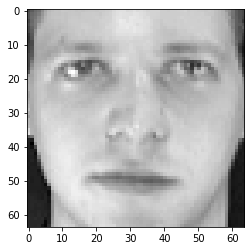

Nome dell'immagine:  image-249.png
Color moments dell'immagine:  [183.12723214285714, 22.86018971819917, 0.06523724418325909]
Distanza dall'immagine in input:  3.654521128500458


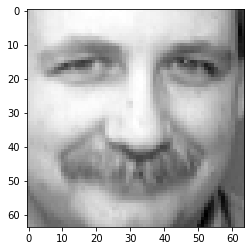

Nome dell'immagine:  image-28.png
Color moments dell'immagine:  [186.68973214285714, 23.711023767150074, 0.17805690666646318]
Distanza dall'immagine in input:  3.753034141702628


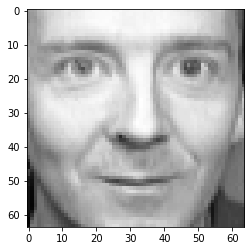

Nome dell'immagine:  image-58.png
Color moments dell'immagine:  [182.38679846938774, 22.45187318166294, 0.08002852039379274]
Distanza dall'immagine in input:  3.9971741824129308


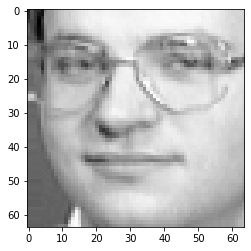

Nome dell'immagine:  image-9.png
Color moments dell'immagine:  [182.3577806122449, 22.743643982733467, 0.21789782732380528]
Distanza dall'immagine in input:  4.143221098127726


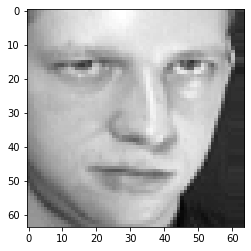

Nome dell'immagine:  image-8.png
Color moments dell'immagine:  [182.61352040816325, 23.121584683078616, -0.20097105987073205]
Distanza dall'immagine in input:  4.149412100012877


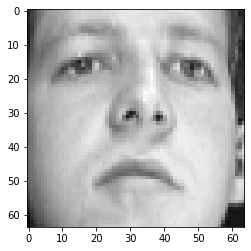

Nome dell'immagine:  image-242.png
Color moments dell'immagine:  [182.34406887755102, 23.333644988915818, -0.12547444244488018]
Distanza dall'immagine in input:  4.455228150861894


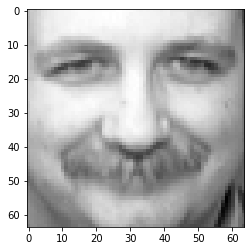

Nome dell'immagine:  image-6.png
Color moments dell'immagine:  [190.5765306122449, 21.9036709630031, 0.07486721013020171]
Distanza dall'immagine in input:  4.658141769077379


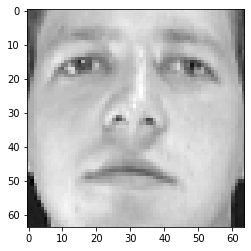

Nome dell'immagine:  image-227.png
Color moments dell'immagine:  [190.8450255102041, 20.84301944840213, -0.027910857809502497]
Distanza dall'immagine in input:  4.821586688968062


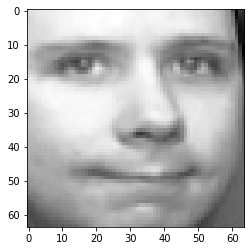

Nome dell'immagine:  image-66.png
Color moments dell'immagine:  [181.3252551020408, 22.575773756904272, 0.1685342686612135]
Distanza dall'immagine in input:  4.961777169692985


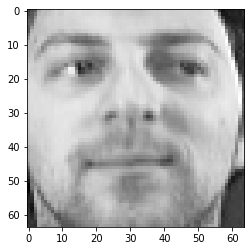

Nome dell'immagine:  image-256.png
Color moments dell'immagine:  [190.68080357142858, 22.77314445220778, -0.0034398377301232317]
Distanza dall'immagine in input:  4.966916828946322


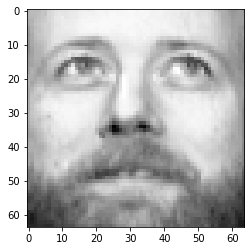

In [155]:
for i in range(0, len(kSimilarImagesOfColorMoments)):
    imageName = kSimilarImagesOfColorMoments[i][0]
    print("Nome dell'immagine: ", kSimilarImagesOfColorMoments[i][0])
    print("Color moments dell'immagine: ", dictionaryOfColorMomentsDescriptors[imageName])
    print("Distanza dall'immagine in input: ", kSimilarImagesOfColorMoments[i][1])

    # load the image
    image = Image.open('./olivetti_PNG_master/images/' + imageName)
    # convert image to numpy array
    # data = asarray(image)

    # display the array of pixels as an image
    # il parametro cmap serve a specificare il tipo di colormap che vogliamo utilizzare, per questo motivo abbiamo specificato gray per la scala di grigi
    pyplot.imshow(image, cmap='gray')
    pyplot.show()

In [156]:
inputImage = 'image-0.png'

[199.8721301020408, 28.80876738707981, 0.1222815089124971]
[('image-0.png', 0.0), ('image-1.png', 1.0), ('image-10.png', 1.0), ('image-100.png', 1.0), ('image-101.png', 1.0), ('image-102.png', 1.0), ('image-103.png', 1.0), ('image-104.png', 1.0), ('image-105.png', 1.0), ('image-106.png', 1.0), ('image-107.png', 1.0)]
[199.8721301020408, 28.80876738707981, 0.1222815089124971]
[('image-0.png', 0.0), ('image-28.png', 4.644188628608644), ('image-227.png', 5.725509912731692), ('image-249.png', 5.929897162072487), ('image-96.png', 6.05528235117151), ('image-229.png', 6.115380819603934), ('image-58.png', 6.276805575216188), ('image-6.png', 6.620444597313179), ('image-110.png', 6.692510851450763), ('image-8.png', 6.7135898164685095), ('image-9.png', 6.73546354035956)]
[199.8721301020408, 28.80876738707981, 0.1222815089124971]
[('image-0.png', 0.0), ('image-28.png', 3.810761222630942), ('image-249.png', 4.10401628889337), ('image-58.png', 4.415989443007275), ('image-9.png', 4.616094961286284), 

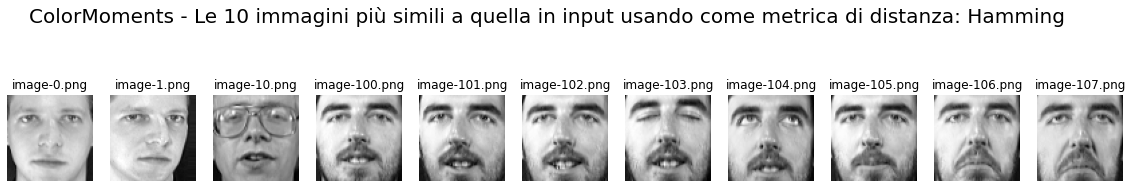

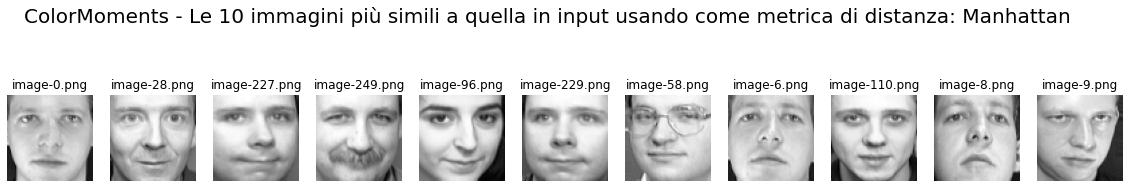

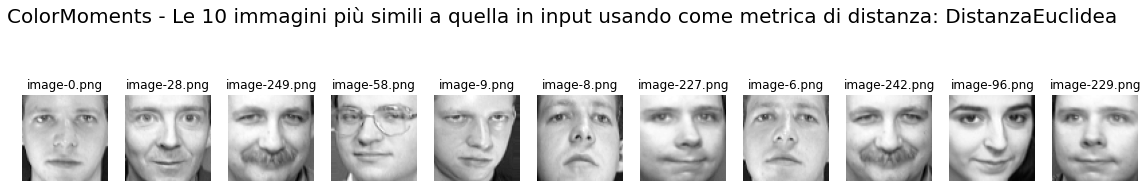

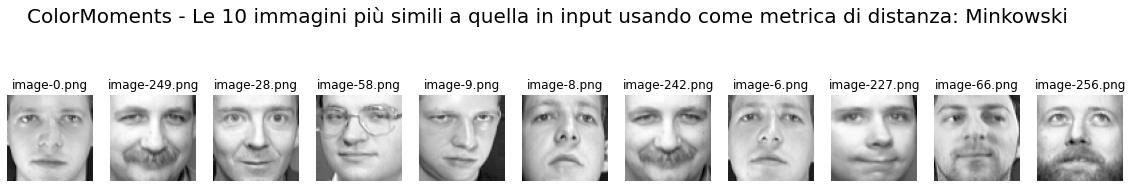

In [157]:
distanceMetrics = ['Hamming', 'Manhattan', 'DistanzaEuclidea', 'Minkowski']

# numero di immagini simili che vogliamo ottenere
k = 10

w = 10
h = 10
columns = k+1
rows = len(distanceMetrics)

currentIndex = 1

for i in range(len(distanceMetrics)):
    fig = plt.figure(figsize=(20, 10))
    fig.suptitle('ColorMoments - ' + 'Le ' + str(k) + ' immagini più simili a quella in input usando come metrica di distanza: ' + distanceMetrics[i], fontsize=20)    # plt.title("CIAO")
    # plt.axis('off')

    kSimilarImagesOfColMom = getKsimilarImages(inputImage, k, 'ColorMoments', distanceMetrics[i])
    #print(kSimilarImagesOfColMom)

    for j in range(len(kSimilarImagesOfColMom)):
        imageName = kSimilarImagesOfColMom[j][0]
        # load the image
        image = Image.open('./olivetti_PNG_master/images/' + imageName)
        
        fig.add_subplot(rows, columns, (j+1))
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(imageName)

        currentIndex += 1

plt.show()


[0.54746698 0.         0.         ... 0.00242788 0.01360166 0.15256751]
[('image-0.png', 0.0), ('image-394.png', 0.9716931216931217), ('image-71.png', 0.9716931216931217), ('image-7.png', 0.9735449735449735), ('image-70.png', 0.9735449735449735), ('image-340.png', 0.9751322751322752), ('image-391.png', 0.9761904761904762), ('image-53.png', 0.9761904761904762), ('image-198.png', 0.9764550264550265), ('image-28.png', 0.9764550264550265), ('image-197.png', 0.9767195767195768)]
[0.54746698 0.         0.         ... 0.00242788 0.01360166 0.15256751]
[('image-0.png', 0.0), ('image-7.png', 233.6401485828386), ('image-2.png', 240.943374715284), ('image-159.png', 265.67054347873307), ('image-6.png', 266.90467958013284), ('image-152.png', 269.6770558306073), ('image-151.png', 280.2559802316425), ('image-235.png', 286.3546050034106), ('image-178.png', 291.9390120092796), ('image-236.png', 292.20939549897844), ('image-231.png', 292.9805125970562)]
[0.54746698 0.         0.         ... 0.00242788 0

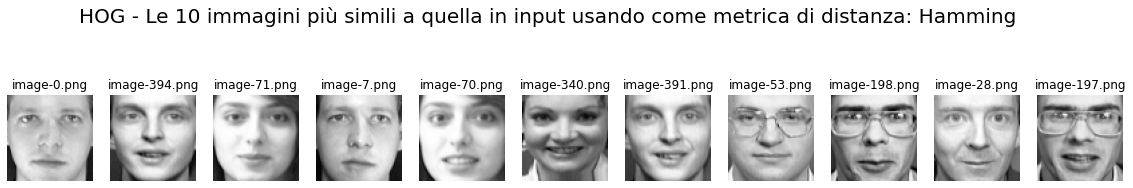

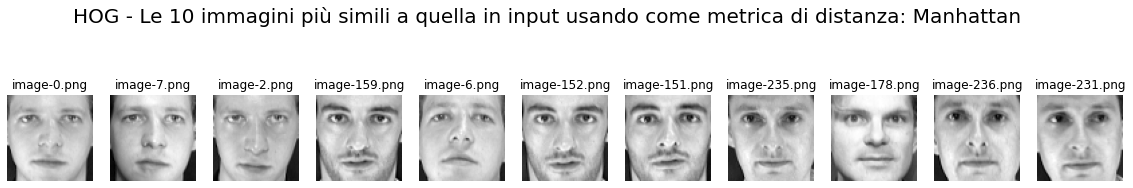

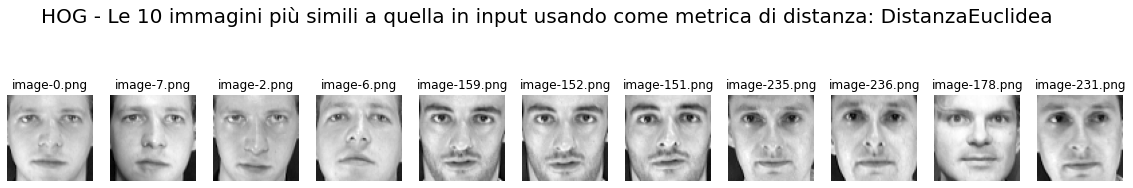

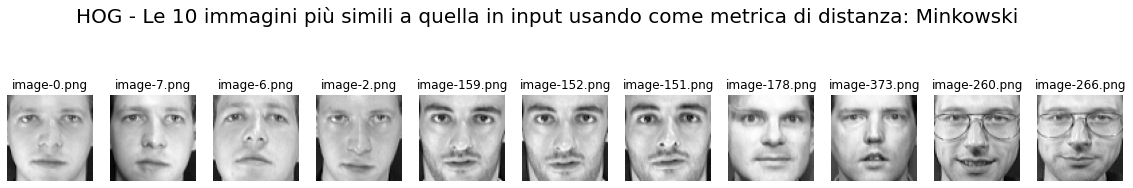

In [158]:
# numero di immagini simili che vogliamo ottenere
k = 10

w = 10
h = 10
columns = k+1
rows = len(distanceMetrics)

currentIndex = 1

for i in range(len(distanceMetrics)):
    fig = plt.figure(figsize=(20, 10))
    fig.suptitle('HOG - ' + 'Le ' + str(k) + ' immagini più simili a quella in input usando come metrica di distanza: ' + distanceMetrics[i], fontsize=20)    # plt.title("CIAO")
    # plt.axis('off')

    kSimilarImagesOfColMom = getKsimilarImages(inputImage, k, 'HOG', distanceMetrics[i])
    #print(kSimilarImagesOfColMom)

    for j in range(len(kSimilarImagesOfColMom)):
        imageName = kSimilarImagesOfColMom[j][0]
        # load the image
        image = Image.open('./olivetti_PNG_master/images/' + imageName)
        
        fig.add_subplot(rows, columns, (j+1))
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(imageName)

        currentIndex += 1

plt.show()


[0.54746698 0.         0.         ... 0.00242788 0.01360166 0.15256751]
[('image-0.png', 0.0), ('image-7.png', 1.9010819276322324), ('image-6.png', 1.9124426299820811), ('image-2.png', 1.95497411148868), ('image-159.png', 1.98707755851245), ('image-152.png', 1.9919780858764524), ('image-151.png', 2.058160235960108), ('image-178.png', 2.1203878496009954), ('image-373.png', 2.1216080599285867), ('image-260.png', 2.12309030378169), ('image-266.png', 2.127232163661581)]
Nome dell'immagine:  image-0.png
HOG features dell'immagine:  [0.5460956  0.0659397  0.00678057 ... 0.00217835 0.02325708 0.22558031]
Distanza dall'immagine in input:  0.0


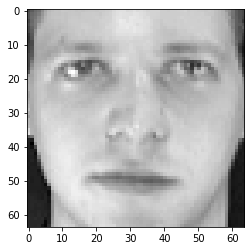

Nome dell'immagine:  image-7.png
HOG features dell'immagine:  [0.54746698 0.         0.         ... 0.00242788 0.01360166 0.15256751]
Distanza dall'immagine in input:  1.9010819276322324


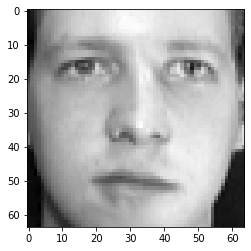

Nome dell'immagine:  image-6.png
HOG features dell'immagine:  [0.38886568 0.         0.         ... 0.00659168 0.02189671 0.03130397]
Distanza dall'immagine in input:  1.9124426299820811


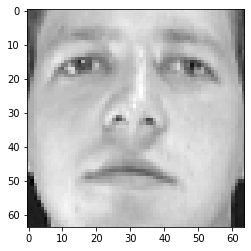

Nome dell'immagine:  image-2.png
HOG features dell'immagine:  [0.54092843 0.1143516  0.02070889 ... 0.01294059 0.02008991 0.40804863]
Distanza dall'immagine in input:  1.95497411148868


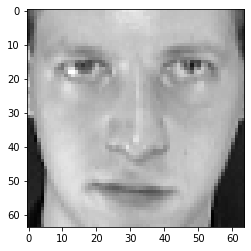

Nome dell'immagine:  image-159.png
HOG features dell'immagine:  [0.47741112 0.03733099 0.         ... 0.00219103 0.01412034 0.05430376]
Distanza dall'immagine in input:  1.98707755851245


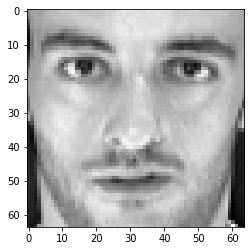

Nome dell'immagine:  image-152.png
HOG features dell'immagine:  [0.35258873 0.01126728 0.00507756 ... 0.32551169 0.2594441  0.39181965]
Distanza dall'immagine in input:  1.9919780858764524


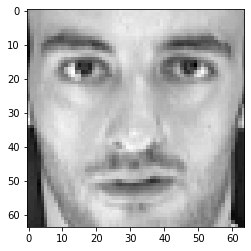

Nome dell'immagine:  image-151.png
HOG features dell'immagine:  [0.35742282 0.00224727 0.         ... 0.16081003 0.31026707 0.40963787]
Distanza dall'immagine in input:  2.058160235960108


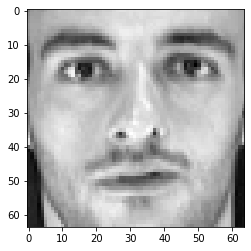

Nome dell'immagine:  image-178.png
HOG features dell'immagine:  [0.3326806  0.1754214  0.01425929 ... 0.         0.00177561 0.42672918]
Distanza dall'immagine in input:  2.1203878496009954


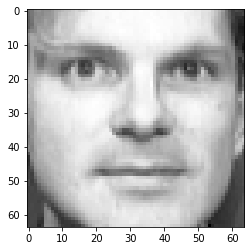

Nome dell'immagine:  image-373.png
HOG features dell'immagine:  [0.34700936 0.10678065 0.04844789 ... 0.00246001 0.01782637 0.09282159]
Distanza dall'immagine in input:  2.1216080599285867


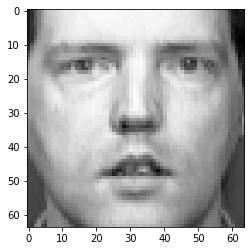

Nome dell'immagine:  image-260.png
HOG features dell'immagine:  [0.43751819 0.         0.         ... 0.12282439 0.33721024 0.33721024]
Distanza dall'immagine in input:  2.12309030378169


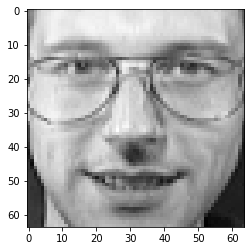

Nome dell'immagine:  image-266.png
HOG features dell'immagine:  [0.55915443 0.01780605 0.         ... 0.09234377 0.07863044 0.21220522]
Distanza dall'immagine in input:  2.127232163661581


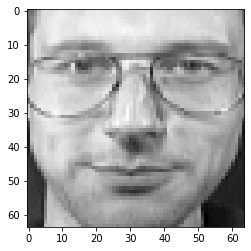

In [159]:
kSimilarImagesOfHOG = getKsimilarImages('image-0.png', 10, 'HOG', 'Minkowski')

for i in range(0, len(kSimilarImagesOfHOG)):
    print("Nome dell'immagine: ", kSimilarImagesOfHOG[i][0])
    print("HOG features dell'immagine: ", dictionaryOfHOGDescriptors[imageName])
    print("Distanza dall'immagine in input: ", kSimilarImagesOfHOG[i][1])

    imageName = kSimilarImagesOfHOG[i][0]
    # load the image
    image = Image.open('./olivetti_PNG_master/images/' + imageName)
    # convert image to numpy array
    # data = asarray(image)

    # display the array of pixels as an image
    # il parametro cmap serve a specificare il tipo di colormap che vogliamo utilizzare, per questo motivo abbiamo specificato gray per la scala di grigi
    pyplot.imshow(image, cmap='gray')
    pyplot.show()